In [10]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

In [6]:
df1=pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2=pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

shapiro(df1)



(0.9094840288162231, 0.06230909377336502)

In [7]:
shapiro(df2)

(0.8978105783462524, 0.03752673789858818)

In [15]:
stats.levene(df1['sample'],df2['sample']) 

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [18]:
stats.levene(df1['sample'],df2['sample'])
t_result=stats.ttest_ind(df1,df2,equal_var=True)
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)


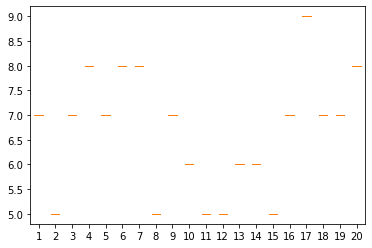

In [32]:
plt.boxplot(df2)
plt.show()

In [34]:
df1=pd.DataFrame({'sample':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
df2=pd.DataFrame({'sample':[1.883,1.751,1.799,1.768,1.711,1.832,1.427,1.344]})

shapiro(df2)





(0.8250620365142822, 0.05272948369383812)

In [35]:

shapiro(df1)


(0.7734811902046204, 0.014793740585446358)

In [37]:
stats.levene(df1['sample'],df2['sample'])


LeveneResult(statistic=0.3209938345096789, pvalue=0.5799810758175175)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6bcb51a390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bcb51ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6bcb513710>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6bcb5238d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bcb523dd0>,
 'means': []}

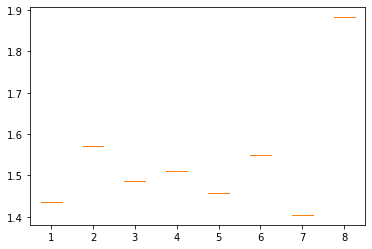

In [44]:
df1=pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2=pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result=stats.ttest_rel(df1,df2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)
print("paried t-test")
print("t{}".format(t))
print("p{}".format(p))

paried t-test
t[-5.324]
p[0.]


In [47]:
df1=pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2=pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})

t_result=stats.ttest_rel(df1,df2)
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)
print("paried t-test")
print("t{}".format(t))
print("p{}".format(p))

paried t-test
t[-2.266]
p[0.05]


In [61]:
count=1500
n_obs=10000
value=0.1

stat,pval=proportions_ztest(count,n_obs,value)
print("1 proportion test")
print("z:{0}".format(stat))
print("p:{0}".format(pval))

1 proportion test
z:14.002800840280093
p:1.4984678147052802e-44


In [63]:
activity = [[1,1,3], [2,2,5], [3,4,7], [4,1,8], [5,5,9], [6,8,10], [7,9,11], [8,11,14], [9,13,16]]

def activitySelection(act):
    result = []

    sortedAct = sorted(act, key=lambda x: x[2])

    last = 0    
    for i in sortedAct:
        if last < i[1]:
            result.append(i)
            last = i[2]

    print("선택된 Activity: ", result)
    result = list(map(lambda x: x[0], result))
    return result

print("선택된 Activity Number: ", activitySelection(activity))


선택된 Activity:  [[1, 1, 3], [3, 4, 7], [6, 8, 10], [8, 11, 14]]
선택된 Activity Number:  [1, 3, 6, 8]


In [64]:
count=40
n_obs=100
value=0.5

stat,pval=proportions_ztest(count,n_obs,value)
print("1 proportion test")
print("z:{0}".format(stat))
print("p:{0}".format(pval))

1 proportion test
z:-2.0412414523193148
p:0.0412268333371637


In [67]:
count=np.array([4,1])
nobs=np.array([1000,1200])

stat,prval=proportions_ztest(count,nobs)

print("2proportion test")
print("z: {}".format(stat))
print("p: {}".format(pval))


2proportion test
z: 1.553109404737079
p: 0.0412268333371637


In [68]:
count=np.array([14,5])
nobs=np.array([1200,1200])

stat,prval=proportions_ztest(count,nobs)

print("2proportion test")
print("z: {}".format(stat))
print("p: {}".format(pval))


2proportion test
z: 2.0729633895345208
p: 0.0412268333371637


In [70]:
df=pd.DataFrame({'a/s':[18,8,4,4,3,3],'가격':[1,2,1,1,1,25],'성능':[8,14,3,2,3,8],'확장성':[7,5,4,3,1,10]
                ,'디자인':[10,5,9,2,1,2],'안정성':[9,9,5,7,1,1],'기능성':[10,4,4,3,1,7]})

chi,pval,dof,expected=stats.chi2_contingency(df.T)
print("chi-square test")
print("chisq:{0:0.3f}".format(chi))
print("p:{0:0.3f}".format(pval)) #피밸류가 0이라는 의미는 대립가설을 채택해도 틀릴가능성이 0%
print("degree pf freedom:{} ".format(dof))
print("expected value :\n{}".format(expected.round(3)))#적합도 검증은 단측검증만 한다]\

chi-square test
chisq:98.274
p:0.000
degree pf freedom:30 
expected value :
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


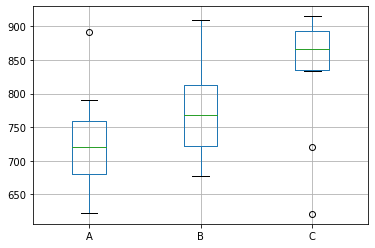

In [3]:
df=pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                 'B':[721,821,910,678,723,790,711,790,745,891],
                 'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])

In [4]:
t_result=stats.f_oneway(df['A'],df['B'],df['C'])
f,p=f_result.statisc.round(3),f_result.prvalue.round(3)
print("one-way")
print("F통계량:{}".format(f))
print("p통계량:{}".format(p))

NameError: name 'f_result' is not defined

In [7]:
df1=[1,2,3,4,4,5,6,6,7,8]
df2=[23,29,49,64,74,87,96,97,109,119]

corr,pval= stats.pearsonr(df1,df2)

print("Correlation Analysis")
print("corr:{0:0.3f}".format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis
corr:0.989
p-value:0.000


In [32]:
MINUTES=[1,2,3,4,4,5,6,6,7,8]
UNITS=[23,29,49,64,74,87,96,97,109,119]

MINUTES=sm.add_constant(MINUTES)
model=sm.OLS(UNITS,MINUTES)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        15:54:59   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

(0.9653438329696655, 0.8446419835090637)

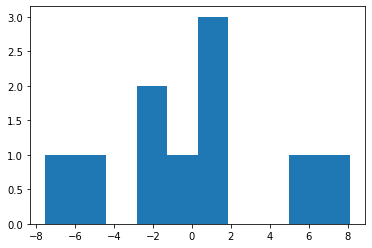

In [34]:
plt.hist(result.resid)
shapiro(result.resid)

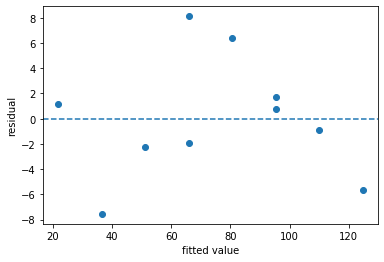

In [36]:
plt.scatter(result.fittedvalues,result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")

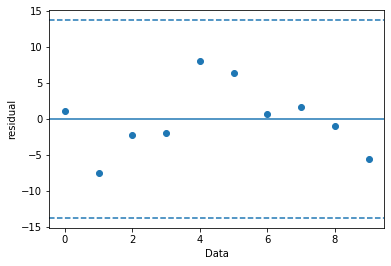

In [39]:
plt.scatter(range(0,10),result.resid,marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="-")
plt.axhline(y=3*np.std(result.resid),linestyle="--")
plt.axhline(y=-3*np.std(result.resid),linestyle="--")